### Colab Link for ALL 3 TASK :



*   Task 1 : - https://colab.research.google.com/drive/18bCExWwfVT0g2uWh7tqDr1vsXcjEGx6l#scrollTo=1UEpkujLAWEa
*   Task 2 : https://colab.research.google.com/drive/1428-0THwtMUC_qGeZX6lieJSwpvEHjGj

* Task 3 : https://colab.research.google.com/drive/1UrMuMc_lgAuQnYGTV5ycWNoc5sBdcKQp




In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import sklearn
import struct
import pandas as pd
import copy
import cv2
import tensorflow as tf
import tensorflow_hub as hb
from tensorflow import keras
from keras import layers, models,regularizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from google.colab import drive
import matplotlib.image as mpimg
import random

from skimage.filters import prewitt_h,prewitt_v
from sklearn.preprocessing import StandardScaler,MinMaxScaler

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Task 1 :** First, follow the instructions to build a custom CNN and complete steps 1, 2, and 3 within Task 1 to achieve an optimal model—let’s call this Model 1.

**Task 2 :**  Then, for Task 2, you need to fine-tune at least three different pre-pretrained models to get good performance. This will likely involve repeating similar steps from Task 1 for each of the three models (let’s call them Models 2, 3, and 4).

**Final :** In total, you’ll have four models: one custom model and three fine-tuned pre-trained models.

In [ ]:
# dataset_path = '/content/drive/My Drive/CS517_Data_Set/'
# files = os.listdir(dataset_path)
# print(files)


In [ ]:
print("Version of tensorflow:",tf.__version__)
print("Tensorflow_hub version:",hb.__version__)

Version of tensorflow: 2.17.0
Tensorflow_hub version: 0.16.1


In [ ]:
### function to change file type from ubyte to d read the MNIST-like dataset from the IDX file format.
def read_idx(filename):
    with open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)

In [ ]:
### checking the file content for each folder
# dataset_path = '/content/drive/My_Drive/CS517_PROJECT_1_ELBAF_GROUP/'
# print(os.listdir(dataset_path + 'train-images-idx3-ubyte'))


In [ ]:
### Storing Data after converting from the IDX formate

train_images_path = '/content/drive/My Drive/CS517_PROJECT_1_ELBAF_GROUP/train-images-idx3-ubyte/train-images-idx3-ubyte'
train_image_labels_path  =  '/content/drive/My Drive/CS517_PROJECT_1_ELBAF_GROUP/train-labels-idx1-ubyte/train-labels-idx1-ubyte'

testing_image_path  = '/content/drive/My Drive/CS517_PROJECT_1_ELBAF_GROUP/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte'
testing_image_labels_path = '/content/drive/My Drive/CS517_PROJECT_1_ELBAF_GROUP/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte'



### Storing the images into training and testing

Training_set = read_idx(train_images_path)
Training_labels = read_idx(train_image_labels_path)

Testing_set = read_idx(testing_image_path)
Testing_labels = read_idx(testing_image_labels_path)

In [ ]:
Training_set.shape , Training_labels.shape,   Testing_set.shape  , Testing_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
Training_set[0].shape

(28, 28)

In [ ]:

## Ploating the images from the traing dataset

def plot_image(data_set, labels, num_images=5):

    plt.figure(figsize=(28,28))   ## thei size of image input is  28 x 28 t
    for i in range(num_images):
        idx = random.randint(0, data_set.shape[0] - 1)
        img = data_set[idx]
        label = labels[idx]

        ax = plt.subplot(1, num_images, i + 1)
        ax.title.set_text(f"Label: {label}")
        plt.imshow(img, cmap='gray')   ## displaying the color ofi image


    plt.show()

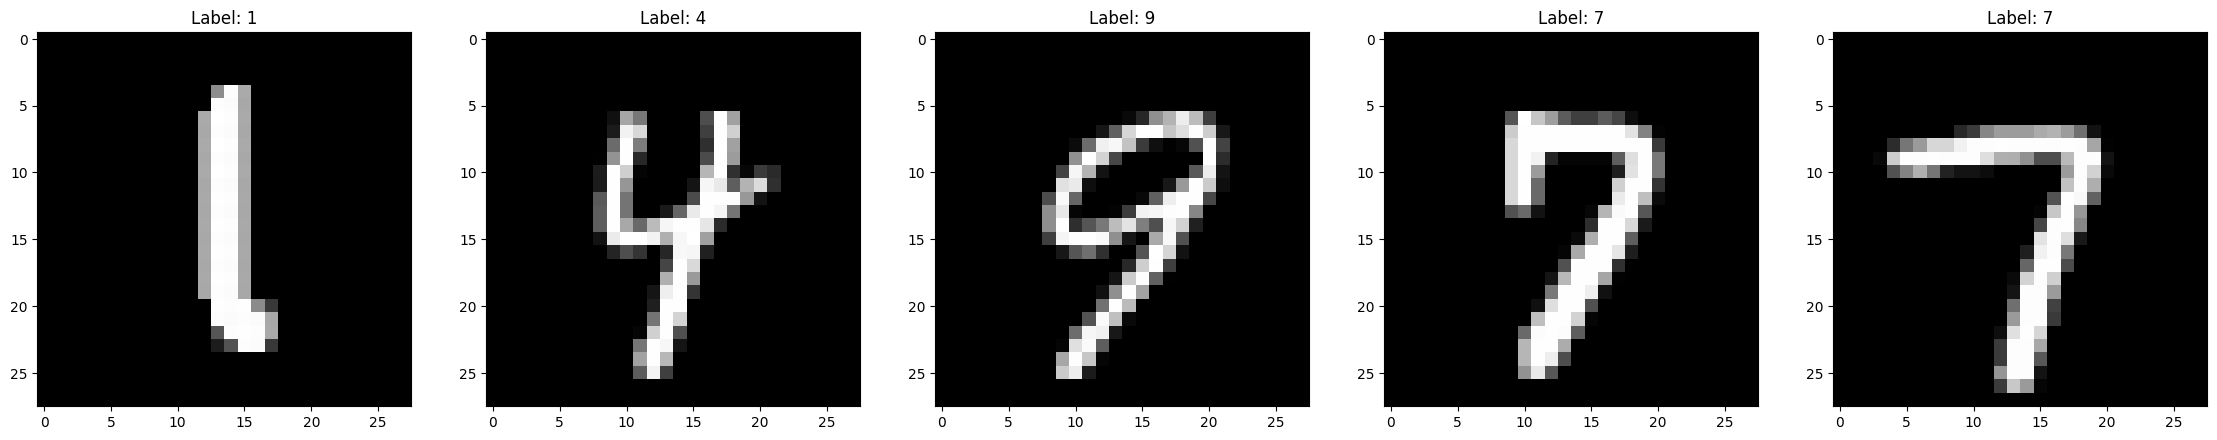

In [ ]:
## Ploating some image form traing set
plot_image(Training_set,Training_labels)

In [ ]:
### ploating the image of testing set
def plot_image(data_set, labels, num_images=5):

    plt.figure(figsize=(28,28))
    for i in range(num_images):
        idx = random.randint(0, data_set.shape[0] - 1)
        img = data_set[idx]
        label = labels[idx]

        ax = plt.subplot(1, num_images, i + 1)
        ax.title.set_text(f"Label: {label}")
        plt.imshow(img, cmap='gray')   ## displaying the color ofi image


    plt.show()

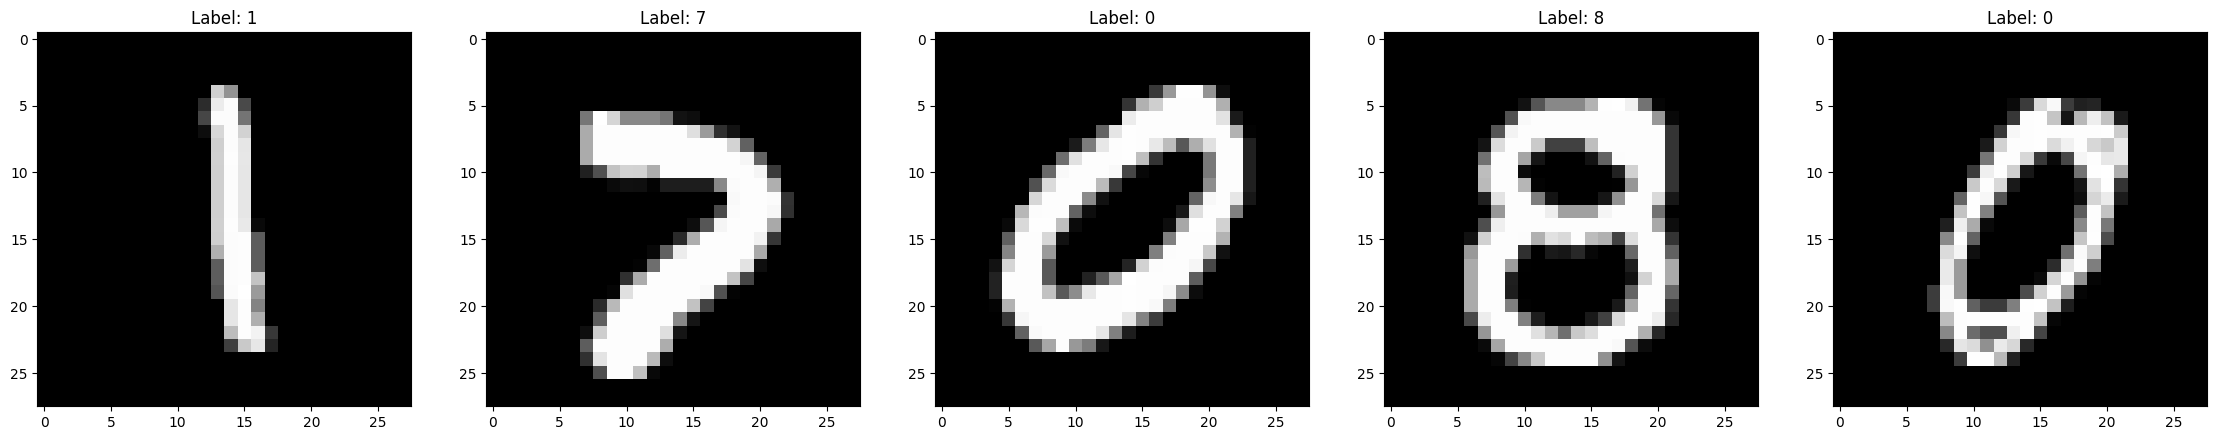

In [ ]:
plot_image(Testing_set,Testing_labels)

# ----------------------------------- Task 1: -----------------------------------------

**Task 1 :** Build your customized Convolution Neural Network (CNN)
• Define the architecture of a Convolution Neural Network (CNN) with more than 3 layers, that takes these images as input and gives as output what the handwritten digits represent for this image.

• Test your machine learning model on the testing set: After finishing the architecture of CNN models, fix your hyper-parameters(learning rate, lambda for penalty, number of layers, and number of neurons per layer), and test your model’s performance on the testing set.

• Implement different optimizer (i.e., at least two). Compare the results in report and analyze the potential reasons.
• Implement different regularization methods for the Neural Networks, such as Dropout, l1 or l2. Compare the results in report and analyze the potential reasons.

## <<<<<<<<<<<---------------- Creating Convolutional  Structure Layers----------------------------->>>>>>>>>>>>>>>>>>

In [ ]:
## Using model sequential  for creating an CNN layers by stacking

model_1 = models.Sequential()

## Input Layer
model_1.add(layers.Conv2D(32,(3,3), strides = 2, padding = 'same', input_shape = (28,28,1))) ## as it is gray scale image


## First Hidden layer structure
model_1.add(layers.Activation('relu')) ## using activation fucntion
model_1.add(layers.BatchNormalization())
model_1.add(layers.MaxPooling2D(pool_size=(2,2),padding = 'same'))
model_1.add(layers.Dropout(0.2))


## Second Hidden Layer structure
model_1.add(layers.Conv2D(64,(5,5),padding = 'same'))
model_1.add(layers.Activation('relu'))
model_1.add(layers.BatchNormalization())
model_1.add(layers.MaxPooling2D(pool_size=(2,2), padding=  'same'))
model_1.add(layers.Dropout(0.2))

### Creaitn the third hidden layers
model_1.add(layers.Conv2D(128,(3,3), padding = 'same'))
model_1.add(layers.Activation('relu'))
model_1.add(layers.BatchNormalization())
model_1.add(layers.MaxPooling2D(pool_size=(2,2), padding=  'same'))
model_1.add(layers.Dropout(0.3))

### Creaign the fourth hidden layers
model_1.add(layers.Conv2D(256,(5,5), padding = 'same'))
model_1.add(layers.Activation('relu'))
model_1.add(layers.BatchNormalization())
model_1.add(layers.MaxPooling2D(pool_size=(2,2), padding=  'same'))
model_1.add(layers.Dropout(0.3))


### Creating the fith hiddend layers
model_1.add(layers.Conv2D(256,(5,5), padding = 'same'))
model_1.add(layers.Activation('relu'))
model_1.add(layers.BatchNormalization())
model_1.add(layers.MaxPooling2D(pool_size=(2,2), padding=  'same'))
model_1.add(layers.Dropout(0.3))




/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
## Now we we will Fattent the model and pass into Dense layer
## CREATING THE FULLY CONNTECT LAYERS AND OUTPUT LAYER

model_1.add(layers.Flatten())
model_1.add(layers.Dense(256, activation= 'relu'))
model_1.add(layers.Dropout(0.2))


## Output Layers
model_1.add(layers.Dense(10,activation= 'softmax')) ## at the last layer we doo softamx to get probability of class it should be classified


In [ ]:
### Seing Final _model Summary and flow of data
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 14, 14, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 14, 14, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 7, 7, 64)            │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 7, 7, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 2, 2, 256)           │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 2, 2, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 2,654,858 (10.13 MB)

 Trainable params: 2,653,386 (10.12 MB)

 Non-trainable params: 1,472 (5.75 KB)

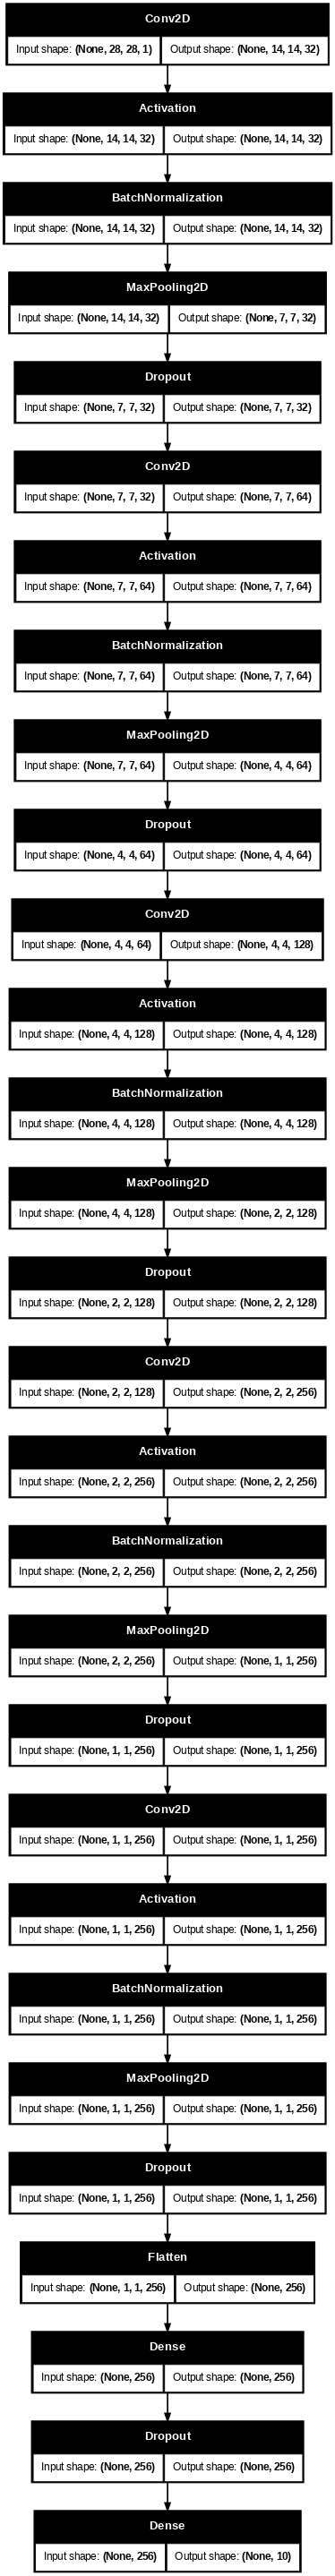

In [ ]:
## Helps to see the graph of the our CNN  layers
tf.keras.utils.plot_model(model_1,show_shapes=True, dpi = 60)

In [ ]:
### Creaiting A custom MODEL_that will have  option to put drop out and L1 AND l2 return the mdoel

def create_custom_cnn_model(dropout_rate=0.2, l1_reg=None, l2_reg=None):

    # Set regularization to None if l1_reg and l2_reg are None
    if l1_reg is None and l2_reg is None:
        K_L = None
    else:
        K_L = regularizers.l1_l2(l1=l1_reg if l1_reg else 0.0, l2=l2_reg if l2_reg else 0.0)

    model = models.Sequential()

    # First Hidden layer structure
    model.add(layers.Conv2D(32, (3, 3), strides=2, padding='same',  input_shape=(28, 28, 1), kernel_regularizer=K_L))
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))
    model.add(layers.Dropout(dropout_rate))

    # second Hidden layer structure
    model.add(layers.Conv2D(64, (5, 5), padding='same', kernel_regularizer=K_L))
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))
    model.add(layers.Dropout(dropout_rate))

    # third Hidden layer structure
    model.add(layers.Conv2D(128, (3, 3), padding='same', kernel_regularizer=K_L))
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))
    model.add(layers.Dropout(dropout_rate))

    # Fourth Hidden layer structure
    model.add(layers.Conv2D(256, (5, 5), padding='same', kernel_regularizer=K_L))
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))
    model.add(layers.Dropout(dropout_rate))

    # Fifth Hidden layer structure
    model.add(layers.Conv2D(256, (5, 5), padding='same', kernel_regularizer=K_L))
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))
    model.add(layers.Dropout(dropout_rate))

    # Flatten
    model.add(layers.Flatten())

    # Fully connected layer and output layer
    model.add(layers.Dense(256, activation='relu', kernel_regularizer=K_L))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(10, activation='softmax'))

    return model


## <<-------------------Creating Different Model based On regularaization method  -------->>


*   DropOut
*   L1
*   L2




In [ ]:
## creaitng the 3 Differet Model with different Reqularization
model1_dropout = create_custom_cnn_model(dropout_rate=0.2, l1_reg=None, l2_reg=None)  ## In this model I USE dropout logic
model2_L1R = create_custom_cnn_model(dropout_rate=0.0, l1_reg=0.0001, l2_reg=None)        ## In this model I use L1 Regualrization
model3_LR2 = create_custom_cnn_model(dropout_rate=0.0, l1_reg=None, l2_reg=0.0002)        ## In this mdoel we sue L2 Regualriation

model4_Drop_L1 =  create_custom_cnn_model(dropout_rate=0.2, l1_reg=0.0001, l2_reg=None)

In [ ]:
model1_dropout.summary()
model2_L1R.summary()
model3_LR2.summary()

#model4_L1_L2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 14, 14, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 7, 7, 64)            │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 2, 2, 256)           │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 1, 1, 256)           │       1,638,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 2,651,914 (10.12 MB)

 Trainable params: 2,651,914 (10.12 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 14, 14, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 7, 7, 64)            │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_12 (Activation)           │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 2, 2, 256)           │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_13 (Activation)           │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 1, 1, 256)           │       1,638,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_14 (Activation)           │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 2,651,914 (10.12 MB)

 Trainable params: 2,651,914 (10.12 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 14, 14, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_15 (Activation)           │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 7, 7, 64)            │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_16 (Activation)           │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_17 (Activation)           │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 2, 2, 256)           │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_18 (Activation)           │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 1, 1, 256)           │       1,638,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_19 (Activation)           │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 2,651,914 (10.12 MB)

 Trainable params: 2,651,914 (10.12 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
### Splitting the Training dataset into training  and validation set


### <<<<<<<<<<<<<<------- Using Different Optimizer and loss function ------------------------------->>>>>>>>>>>>.

#### Different Optimizer
*   adam
*   RMSprop




In [ ]:
## creating a function to  compile with different Optimizer and loss function
def model_compile_and_fit(model, optimizer, loss, metrics, X_train, y_train, X_val, y_val, patience=4, epochs=10):

    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=patience, restore_best_weights=True)

    history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                        epochs=epochs,  callbacks=[early_stop])

    return model, history


In [ ]:
### Creating Function to show the graph of accuracy for training and validation set

def plot_training_history(history):

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # accuracy for training and validation
    plt.figure(figsize=(10,5), frameon=False)
    plt.plot(epochs, acc, c='g', ls='-.', lw='4', label='Training Accuracy')
    plt.plot(epochs, val_acc, c='r', ls='-.', lw='4', label='Validation Accuracy')
    plt.legend()
    plt.title('Accuracy for Training and Validation over the Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

    # loss for training and validation
    plt.figure(figsize=(10,5), frameon=False)
    plt.plot(epochs, loss, c='b', ls='-.', lw='4', label='Training Loss')
    plt.plot(epochs, val_loss, c='orange', ls='-.', lw='4', label='Validation Loss')
    plt.legend()
    plt.title('Loss for Training and Validation over the Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()


### ---------------------------------- Creating the Validation set from Training set  -----------------------------------

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(Training_set, Training_labels, test_size=0.2, random_state=42)

In [ ]:
X_train.shape , X_val.shape,  y_train.shape, y_train.shape

((48000, 28, 28), (12000, 28, 28), (48000,), (48000,))

### ----------------------- Testing Dropout_MODEL(with Adam) ---------------------------

In [ ]:
### Generating Drop_out_model  with folliwng  model = model1_dropout, and optimzers
optimizer = tf.keras.optimizers.Adam()
loss = 'sparse_categorical_crossentropy'

metrics = ['accuracy']



Drop_out_train_model , Drop_out_train_history = model_compile_and_fit(model1_dropout, optimizer, loss, metrics, X_train, y_train, X_val, y_val, patience=2, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.7274 - loss: 0.8003 - val_accuracy: 0.9751 - val_loss: 0.0942
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9542 - loss: 0.1792 - val_accuracy: 0.9768 - val_loss: 0.0815
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9621 - loss: 0.1499 - val_accuracy: 0.9762 - val_loss: 0.0867
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9659 - loss: 0.1327 - val_accuracy: 0.9812 - val_loss: 0.0720
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9685 - loss: 0.1299 - val_accuracy: 0.9797 - val_loss: 0.0942


Graph of Droput model with  Adam optimizer


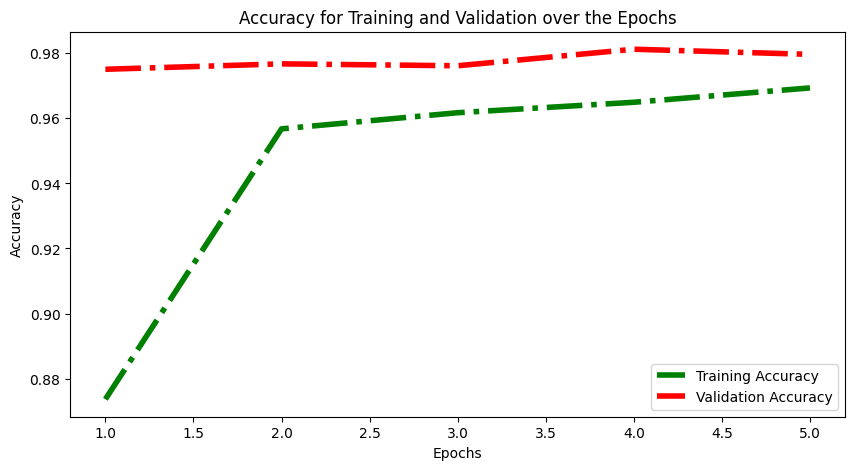

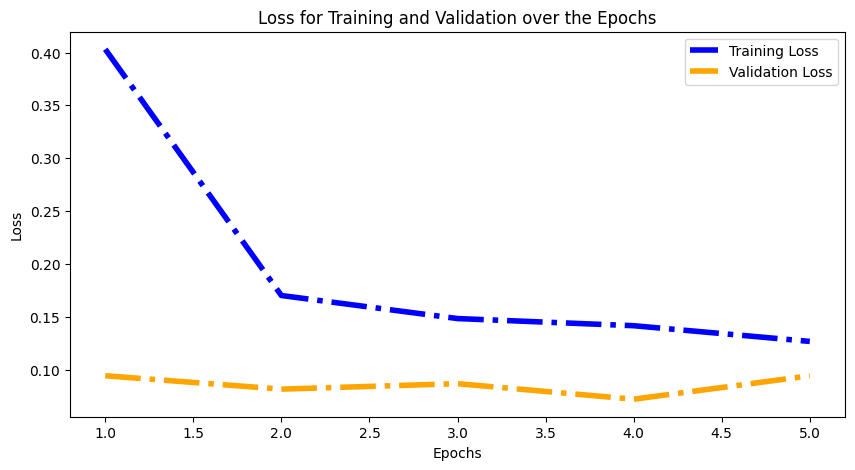

In [ ]:
print("Graph of Droput model with  Adam optimizer")
plot_training_history(Drop_out_train_history)


## Dropout + RMSProp

In [ ]:
###  Generating Drop_out_model  with folliwng  model = model1_dropout, and optimzers
optimizer = tf.keras.optimizers.RMSprop(0.0001)
loss = 'sparse_categorical_crossentropy'

metrics = ['accuracy']

Drop_out_train_model_2 , Drop_out_train_history_2 = model_compile_and_fit(model1_dropout, optimizer, loss, metrics, X_train, y_train, X_val, y_val, patience=2, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9760 - loss: 0.0959 - val_accuracy: 0.9848 - val_loss: 0.0724
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.9820 - loss: 0.0810 - val_accuracy: 0.9855 - val_loss: 0.0730
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9825 - loss: 0.0834 - val_accuracy: 0.9865 - val_loss: 0.0734
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9828 - loss: 0.0791 - val_accuracy: 0.9865 - val_loss: 0.0681
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9822 - loss: 0.0791 - val_accuracy: 0.9864 - val_loss: 0.0733


Graph of Droput model with  RMSprop optimizer


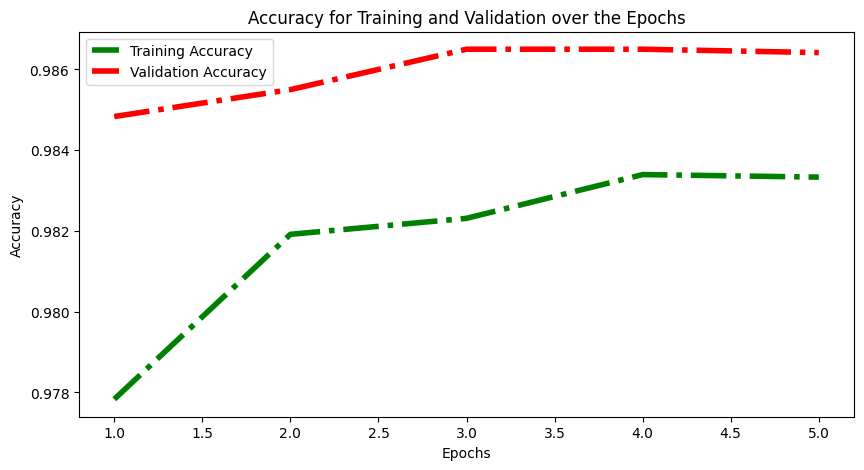

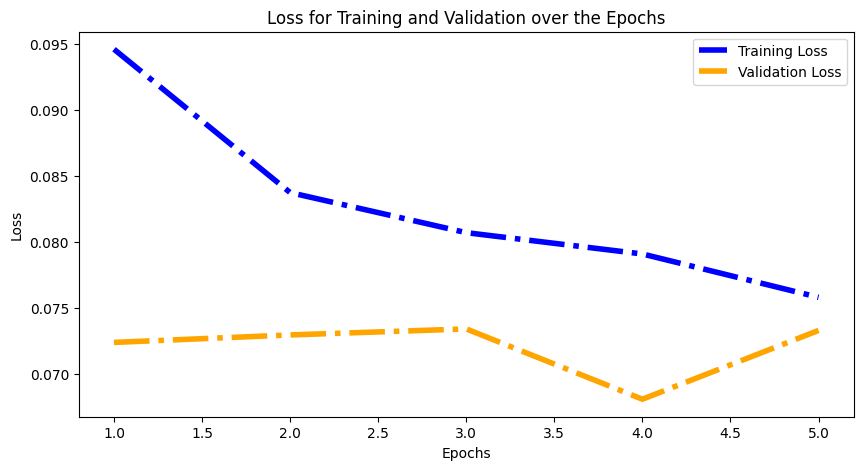

In [ ]:
print("Graph of Droput model with  RMSprop optimizer")
plot_training_history(Drop_out_train_history_2)

## ---Testing L1_Reguarlization_model(with no dropout && (with Different Optimizer) )----


## L1 + Adam

In [ ]:
optimizer = tf.keras.optimizers.Adam()
loss = 'sparse_categorical_crossentropy'

metrics = ['accuracy']

### Model using =  model2_L1R
L1_R_train_model_1 , L1_R_train_history_1 = model_compile_and_fit(model2_L1R , optimizer, loss, metrics, X_train, y_train, X_val, y_val, patience=5, epochs=10)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.8314 - loss: 1.2303 - val_accuracy: 0.9643 - val_loss: 0.4520
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9733 - loss: 0.3802 - val_accuracy: 0.9785 - val_loss: 0.3044
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9797 - loss: 0.2860 - val_accuracy: 0.9826 - val_loss: 0.2615
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9840 - loss: 0.2427 - val_accuracy: 0.9791 - val_loss: 0.2561
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9846 - loss: 0.2253 - val_accuracy: 0.9798 - val_loss: 0.2267
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9871 - loss: 0.2091 - val_accuracy: 0.9801 - val_loss: 0.2217
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9860 - loss: 0.2010 - val_accuracy: 0.9797 - val_loss: 0.2268
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9865 - loss: 0.199

Graph of L1 model with  Adam optimizer


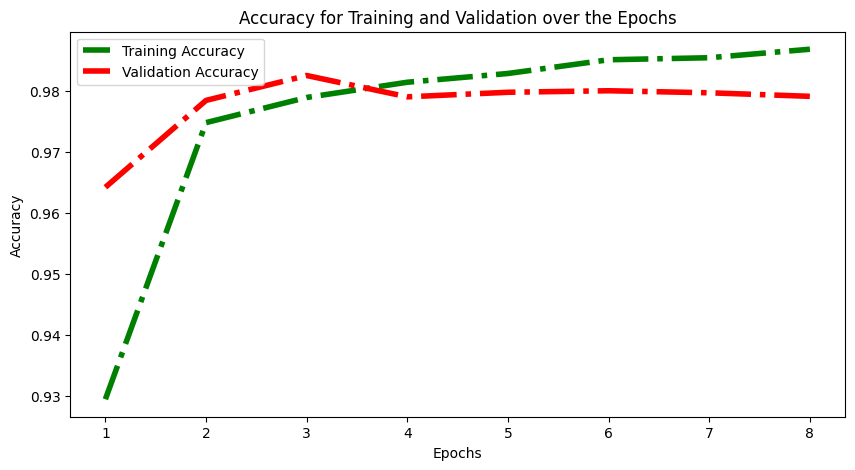

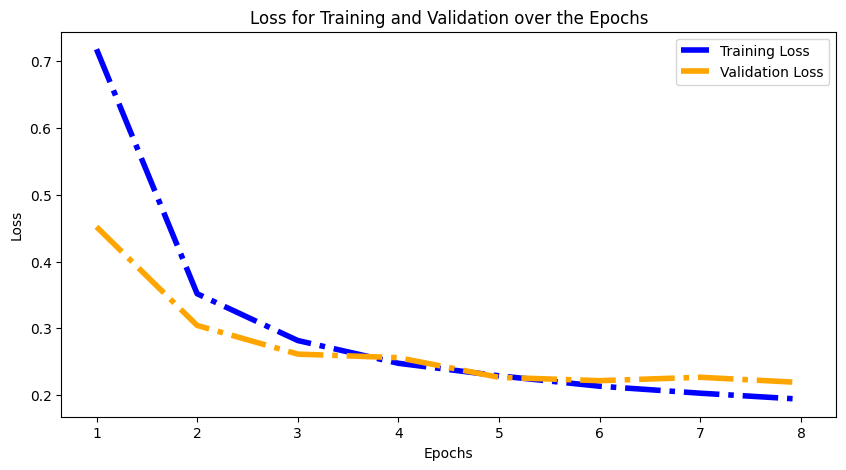

In [ ]:
print("Graph of L1 model with  Adam optimizer")
plot_training_history(L1_R_train_history_1)

## L1 + RMSProp

In [ ]:
optimizer = tf.keras.optimizers.RMSprop(0.0001)
loss = 'sparse_categorical_crossentropy'

metrics = ['accuracy']

### Model using =  model2_L1R
L1_R_train_model_2 , L1_R_train_history_2 = model_compile_and_fit(model2_L1R , optimizer, loss, metrics, X_train, y_train, X_val, y_val, patience=5, epochs=10)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9911 - loss: 0.1790 - val_accuracy: 0.9861 - val_loss: 0.1684
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9942 - loss: 0.1321 - val_accuracy: 0.9865 - val_loss: 0.1513
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9946 - loss: 0.1180 - val_accuracy: 0.9873 - val_loss: 0.1387
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9947 - loss: 0.1092 - val_accuracy: 0.9861 - val_loss: 0.1342
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9952 - loss: 0.1008 - val_accuracy: 0.9868 - val_loss: 0.1261
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9949 - loss: 0.0950 - val_accuracy: 0.9862 - val_loss: 0.1204
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9960 - loss: 0.0900 - val_accuracy: 0.9869 - val_loss: 0.1169
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9963 - loss: 0.0842

Graph of L1 model with  RMSprop optimizer


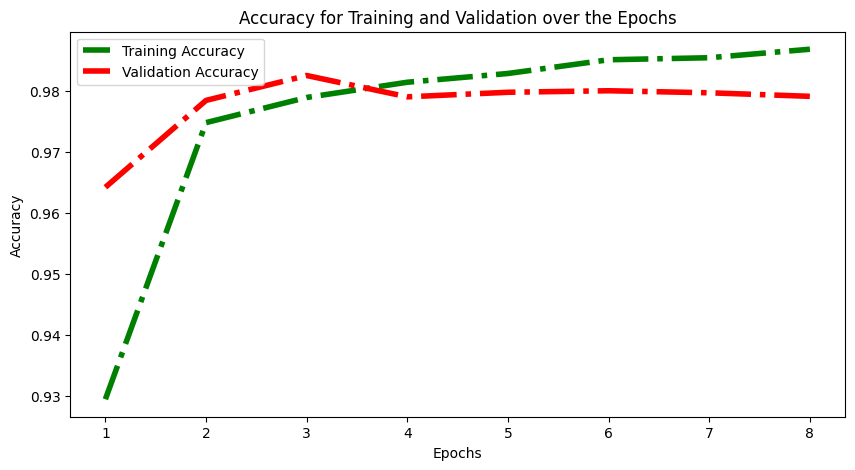

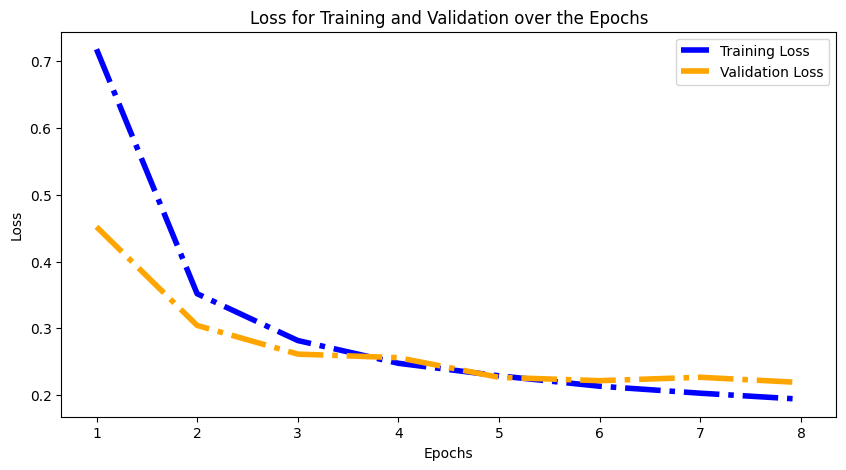

In [ ]:
print("Graph of L1 model with  RMSprop optimizer")
plot_training_history(L1_R_train_history_1)

## ---- Testing L2 Reguarlization_model(with no dropout && (with Different Optimizer) )----

## L2 + Adam

In [ ]:
optimizer = tf.keras.optimizers.Adam()
loss = 'sparse_categorical_crossentropy'

metrics = ['accuracy']

### Model using =  model3_LR2
L2_R_train_model_1 , L2_R_train_history_1 = model_compile_and_fit(model3_LR2 , optimizer, loss, metrics, X_train, y_train, X_val, y_val, patience=5, epochs=10)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8495 - loss: 0.5196 - val_accuracy: 0.9497 - val_loss: 0.2403
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.9753 - loss: 0.1541 - val_accuracy: 0.9822 - val_loss: 0.1369
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9823 - loss: 0.1281 - val_accuracy: 0.9713 - val_loss: 0.1704
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9844 - loss: 0.1190 - val_accuracy: 0.9757 - val_loss: 0.1557
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9874 - loss: 0.1105 - val_accuracy: 0.9803 - val_loss: 0.1373
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9889 - loss: 0.1025 - val_accuracy: 0.9836 - val_loss: 0.1260
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9903 - loss: 0.0950 - val_accuracy: 0.9844 - val_loss: 0.1269
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9908 - loss: 0.0939

Graph of L2 model with  Adam optimizer


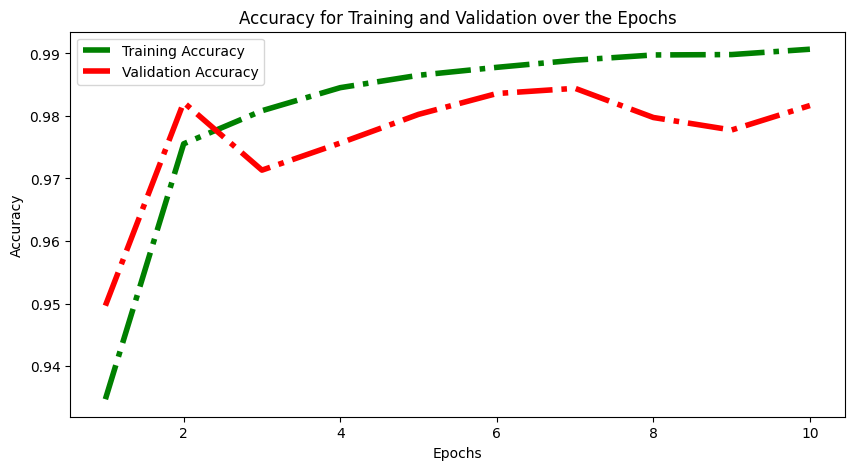

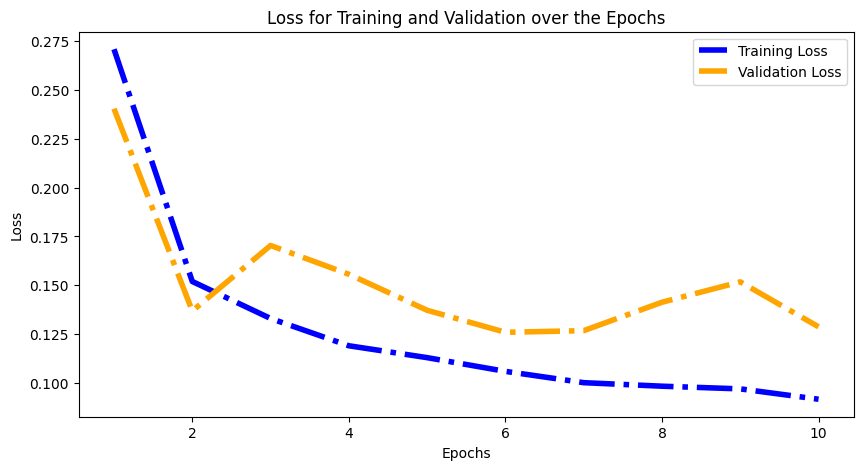

In [ ]:
print("Graph of L2 model with  Adam optimizer")
plot_training_history(L2_R_train_history_1)

## L2 + RMS Prop

In [ ]:
optimizer = tf.keras.optimizers.RMSprop(0.0001)
loss = 'sparse_categorical_crossentropy'

metrics = ['accuracy']

### Model using =  model3_LR2
L2_R_train_model_2 , L2_R_train_history_2 = model_compile_and_fit(model3_LR2 , optimizer, loss, metrics, X_train, y_train, X_val, y_val, patience=5, epochs=10)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9963 - loss: 0.0730 - val_accuracy: 0.9896 - val_loss: 0.1073
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9983 - loss: 0.0552 - val_accuracy: 0.9899 - val_loss: 0.0969
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9990 - loss: 0.0455 - val_accuracy: 0.9898 - val_loss: 0.0886
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9994 - loss: 0.0361 - val_accuracy: 0.9889 - val_loss: 0.0843
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9993 - loss: 0.0313 - val_accuracy: 0.9896 - val_loss: 0.0755
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9994 - loss: 0.0267 - val_accuracy: 0.9903 - val_loss: 0.0720
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9996 - loss: 0.0231 - val_accuracy: 0.9891 - val_loss: 0.0691
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9996 - loss: 0.0203

Graph of L2 model with  RMSprop optimizer


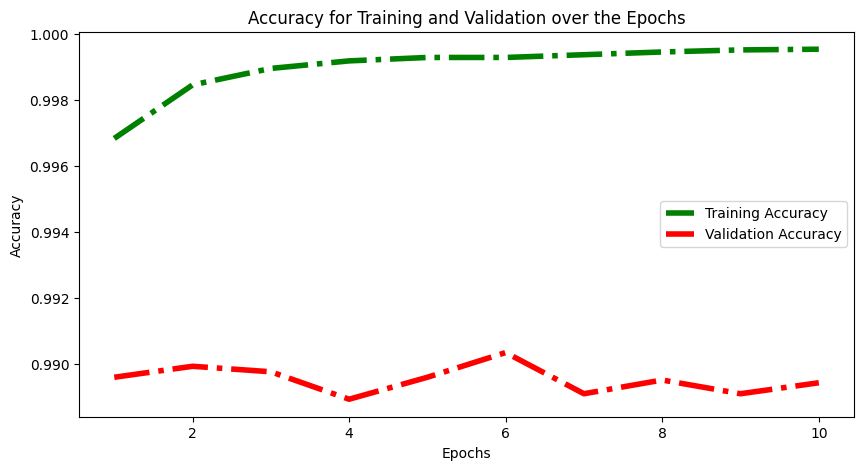

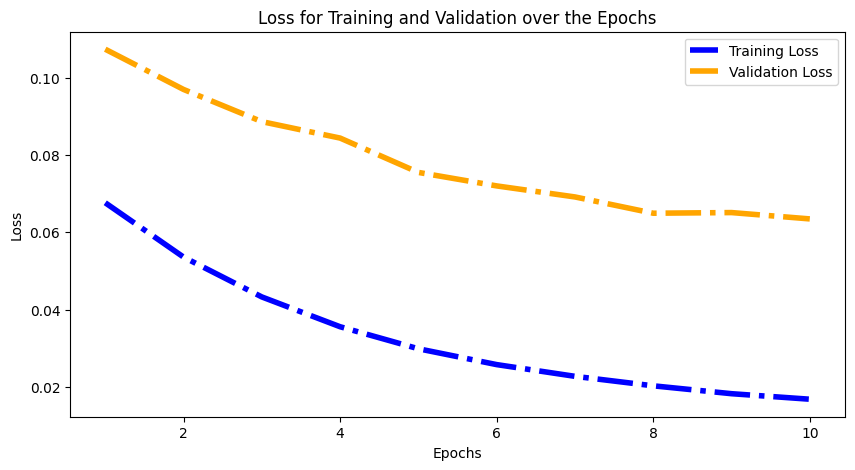

In [ ]:
print("Graph of L2 model with  RMSprop optimizer")
plot_training_history(L2_R_train_history_2)

## --------- Best 3 Model Out of 6 Different models are:



*   Drop_out_train_model_2
*   L1_R_train_model_2
*   L2_R_train_model_2





###----------------- Comparing the 3 models ----------------------------------------

In [ ]:
#  Model 1 (Dropout)
dropout_val_loss, dropout_val_accuracy = Drop_out_train_model_2.evaluate(X_val, y_val)

#  Model 2 (L1 Regularization)
l1_val_loss, l1_val_accuracy = L1_R_train_model_2.evaluate(X_val, y_val)

#  Model 3 (L2 Regularization)
l2_val_loss, l2_val_accuracy = L2_R_train_model_2.evaluate(X_val, y_val)




375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9880 - loss: 0.0697
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9872 - loss: 0.1377
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9908 - loss: 0.0668


In [ ]:
validation_Tabel = pd.DataFrame({

    'Model Type ':
     ['Dropout Model', 'L1 Regularization Model', 'L2 Regularization Model'],
    'Validation Accuracy': [dropout_val_accuracy, l1_val_accuracy, l2_val_accuracy],
    'Validation Loss': [dropout_val_loss, l1_val_loss, l2_val_loss]
})

# Display the DataFrame using Pandas
print(validation_Tabel)

               Model Type   Validation Accuracy  Validation Loss
0            Dropout Model             0.986500         0.073407
1  L1 Regularization Model             0.987333         0.138711
2  L2 Regularization Model             0.990333         0.071976


### ----------------------------- Best model :L2 Regularization Model ---------------


* L2_regualrization is best model becouse it has the  higest validation accuray of 0.9893333

* Model_Name  =  L2_R_train_model_2




## ----------------------Testing our model on TEST DATASET  ---------------------------



In [ ]:
predictions_labels = L2_R_train_model_2.predict(Testing_set)
pre_labels = np.argmax(predictions_labels, axis =1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


### Testing Accuracy Score on Testing data set


In [ ]:


Testing_accuracy = accuracy_score(Testing_labels,pre_labels)
print(f"Testing Accuracy: {Testing_accuracy}")

Testing Accuracy: 0.9902


In [ ]:
print(classification_report(Testing_labels,pre_labels))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
L2_R_train_model_2.save('Custom_CNN_mode_TASK1.h5')